### Project 1
### Name Tao Jiang (Tommy)
### Student ID: 20004769

# Red Card Exploratory Data Analysis

# *Introduction*

## Abstract

 #### I analyzed the data from the soccer player and referee playing in 2012-2013 in the first male divisions of Europe. The aim of discovering is that a less relevant between player skin tone and getting red card rate. It is analyzing other reasons that might affect red cards at the same time. Furthermore, Finding a phenomenon that some referees give more red cards to dark skin-toned players.


### *Research Question*: 
> ###  A darker player is given a red card more than a lighter player under the same conditions

## Summary 

####  Although I can observe that dark-skinned players are more likely to be sent off or get red cards, I have no evidence to suggest racism on the part of the referees. Small amounts of referee bias due to skin tone to give the player red cards. After accounting for shared variability between covariates(i.e., players' position, height, weight) and players' tone color and red cards, results revealed support for a bivariate relation between player skin tone color and red cards given. However,  there is no strong correlation between skin tone and red cards.¶


## About Dataset

### skin tones
>The Player’s photo was available from the source for 1,586 out of 2,053 players. Players’ skin tone was coded by two independent raters blind to the research question who, based on their profile photo, categorized players on a 5-point scale ranging from “very light skin” to “very dark skin” with “neither dark nor light skin” as the center value.





### **Data Structure**
> The dataset is available as a list with 146,028 dyads of players and referees and includes details from players, details from referees and details regarding the interactions of player-referees. A summary of the variables of interest can be seen below. A detailed description of all variables included can be seen in the README file on the project website.

https://osf.io/jv6yw/files/

| Variable Name: | Variable Description: | 
| -- | -- | 
| playerShort | short player ID | 
| player | player name | 
| club | player club | 
| leagueCountry | country of player club (England, Germany, France, and Spain) | 
| height | player height (in cm) | 
| weight | player weight (in kg) | 
| position | player position | 
| games | number of games in the player-referee dyad | 
| goals | number of goals in the player-referee dyad | 
| yellowCards | number of yellow cards player received from the referee | 
| yellowReds | number of yellow-red cards player received from the referee | 
| redCards | number of red cards player received from the referee | 
| photoID | ID of player photo (if available) | 
| rater1 | skin rating of photo by rater 1 | 
| rater2 | skin rating of photo by rater 2 | 
| refNum | unique referee ID number (referee name removed for anonymizing purposes) | 
| refCountry | unique referee country ID number | 
| meanIAT | mean implicit bias score (using the race IAT) for referee country | 
| nIAT | sample size for race IAT in that particular country | 
| seIAT | standard error for mean estimate of race IAT   | 
| meanExp | mean explicit bias score (using a racial thermometer task) for referee country | 
| nExp | sample size for explicit bias in that particular country | 
| seExp |  standard error for mean estimate of explicit bias measure | 



****

* ## Loading the data and analysis libraries

In [2]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams
# rcParams['figure.figsize'] = 25, 20
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
matplotlib.style.use('ggplot')
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [3]:
def get_subgroup(dataframe, g_index, g_columns):
    """ check duplicate data """
    g = dataframe.groupby(g_index).agg({col:'nunique' for col in g_columns})
    if g[g > 1].dropna().shape[0] != 0:
        print(" the group has mult same values !")
    return dataframe.groupby(g_index).agg({col:'max' for col in g_columns})

def load_subgroup(filename, index_col=[0]):
    return pd.read_csv(filename, compression='gzip', index_col=index_col)

def save_subgroup(dataframe, g_index, subgroup_name, prefix='raw_'):
    """ save dataframe in csv """
    save_subgroup_filename = "".join([prefix, subgroup_name, ".csv.gz"])
    dataframe.to_csv(save_subgroup_filename, compression='gzip', encoding='UTF-8')

In [4]:
data_frame = pd.read_csv("../Datasets/CrowdstormingDataJuly1st.csv") #read rog data

In [5]:
# data_frame.head()

> #### There are 146028 records and 28 feature labels in the dataset. In this report, I select several features to analyze. We won't talk about some features such as counties and clubs, and the main reason is that some culture and history could be invisible influence factors.

In [6]:
data_frame.shape # 28 features

(146028, 28)

> #### The statistics show that mean, max, min of each feature. We could get the information about players such as  height and weight of players usually are 181cm and 76kg. The average number of wins and per player is 2.9 and 0.012.


In [7]:
data_frame.describe()

height         weight          games      victories  \
count  145765.000000  143785.000000  146028.000000  146028.000000   
mean      181.935938      76.075662       2.921166       1.278344   
std         6.738726       7.140906       3.413633       1.790725   
min       161.000000      54.000000       1.000000       0.000000   
25%       177.000000      71.000000       1.000000       0.000000   
50%       182.000000      76.000000       2.000000       1.000000   
75%       187.000000      81.000000       3.000000       2.000000   
max       203.000000     100.000000      47.000000      29.000000   

                ties        defeats          goals    yellowCards  \
count  146028.000000  146028.000000  146028.000000  146028.000000   
mean        0.708241       0.934581       0.338058       0.385364   
std         1.116793       1.383059       0.906481       0.795333   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       1.000000   
max        14.000000      18.000000      23.000000      14.000000   

          yellowReds       redCards         rater1         rater2  \
count  146028.000000  146028.000000  124621.000000  124621.000000   
mean        0.011381       0.012559       0.264255       0.302862   
std         0.107931       0.112889       0.295382       0.293020   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.250000       0.250000   
75%         0.000000       0.000000       0.250000       0.500000   
max         3.000000       2.000000       1.000000       1.000000   

              refNum     refCountry        meanIAT          nIAT  \
count  146028.000000  146028.000000  145865.000000  1.458650e+05   
mean     1534.827444      29.642842       0.346276  1.969741e+04   
std       918.736625      27.496189       0.032246  1.271262e+05   
min         1.000000       1.000000      -0.047254  2.000000e+00   
25%       641.000000       7.000000       0.334684  1.785000e+03   
50%      1604.000000      21.000000       0.336628  2.882000e+03   
75%      2345.000000      44.000000       0.369894  7.749000e+03   
max      3147.000000     161.000000       0.573793  1.975803e+06   

              seIAT        meanExp          nExp          seExp  
count  1.458650e+05  145865.000000  1.458650e+05  145865.000000  
mean   6.310849e-04       0.452026  2.044023e+04       0.002994  
std    4.735857e-03       0.217469  1.306157e+05       0.019723  
min    2.235373e-07      -1.375000  2.000000e+00       0.000001  
25%    5.454025e-05       0.336101  1.897000e+03       0.000225  
50%    1.508847e-04       0.356446  3.011000e+03       0.000586  
75%    2.294896e-04       0.588297  7.974000e+03       0.001002  
max    2.862871e-01       1.800000  2.029548e+06       1.060660

* ## players data processing

> ####  Firstly we process players' information and try to find which feature might impact red cards. And then check information of the player is unique or not. Some reasons could record a player's information duplicate times. It might have a severe impact on our results. 
There is no duplication of players in the dataset.

In [8]:
player_index = 'playerShort'
player_cols = ['birthday','height','weight','position','rater1','rater2','yellowReds','redCards']
players = get_subgroup(data_frame, player_index, player_cols)
players.head()

birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   

                        rater1  rater2  yellowReds  redCards  
playerShort                                                   
aaron-hughes              0.25    0.00           0         0  
aaron-hunt                0.00    0.25           0         1  
aaron-lennon              0.25    0.25           0         0  
aaron-ramsey              0.00    0.00           0         1  
abdelhamid-el-kaoutari    0.25    0.25           1         1

> #### The feature of rater1 and rater2 are not intuitive enough and statistically. I create a new feature to replace them and drop null columns as well. 

In [9]:
players['skintone'] = players[['rater1', 'rater2']].mean(axis=1) #  skintone fature
players['skintone'].dropna()
players.shape

(2053, 9)

> #### The data only provide the number of yellow-red cards and red cards. In this case, the red card means directly to get a red card and sent off. I am using the feature of "totalRedCards" to calculate all red cards and rename the feature "red cards" to "strictRedCards." I separate players who get any red cards or not by the feature of "more OneCard".

In [116]:
players['totalRedCards'] = players['yellowReds'] + players['redCards'] #  totalRedCards fature
players.rename(columns={'redCards': 'strictRedCards'}, inplace=True) # 
players['moreOneCard'] = players['totalRedCards'] >0
print(players.shape)
players.head()

(2053, 11)


birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   

                        rater1  rater2  yellowReds  strictRedCards  skintone  \
playerShort                                                                    
aaron-hughes              0.25    0.00           0               0     0.125   
aaron-hunt                0.00    0.25           0               1     0.125   
aaron-lennon              0.25    0.25           0               0     0.250   
aaron-ramsey              0.00    0.00           0               1     0.000   
abdelhamid-el-kaoutari    0.25    0.25           1               1     0.250   

                        totalRedCards  moreOneCard  
playerShort                                         
aaron-hughes                        0        False  
aaron-hunt                          1         True  
aaron-lennon                        0        False  
aaron-ramsey                        1         True  
abdelhamid-el-kaoutari              2         True

> #### Visualizing the distribution of the dataset and We could get the father information that the light skin players more than dark skin players in European leagues.

In [117]:
players = players[players.skintone.notnull()] # drop missing data
sns.distplot(players.skintone, kde=True) # light skin more than dark skin
sns.utils.axlabel('Skintone', 'Density of players')
plt.title("skine-player")  
plt.show()

> #### The table shows us that players who received the most numbers of red cards are the darkest skin. And there were significant changes in the amounts of both values at the chart. The figure reached the lowest point at 0.625. The level of skin tone players might be Asian or Latino. And then there is a rising tendency in both numbers of 'totalRedCards' and 'more one card'. We could get a result that the darkest skin tone players have a high opportunity to get more than one card and red card.  

In [118]:
skintone_mean = players.groupby(['skintone']).mean()
skintone_mean = skintone_mean[['totalRedCards','yellowReds','strictRedCards','moreOneCard']]
skintone_mean.sort_values(by=['totalRedCards'],ascending=False)

totalRedCards  yellowReds  strictRedCards  moreOneCard
skintone                                                        
1.000          1.250000    0.554348        0.695652     0.858696
0.375          1.168831    0.558442        0.610390     0.753247
0.250          1.137712    0.546610        0.591102     0.735169
0.875          1.075000    0.475000        0.600000     0.700000
0.000          1.016509    0.488208        0.528302     0.695755
0.750          0.961538    0.480769        0.480769     0.663462
0.125          0.960352    0.466960        0.493392     0.669604
0.500          0.905172    0.422414        0.482759     0.594828
0.625          0.727273    0.454545        0.272727     0.575758

In [119]:
skintone_mean[['moreOneCard','totalRedCards']].plot()
plt.title("skintone - redCard ", alpha=0.8)
plt.ylabel(u"cards") 
plt.legend(loc='upper left')
plt.show()

> #### The pivot table informs us a player has been received a red card is belongs to a yellow card to a red card or strict a red card. The yellow line at skin tone 0.625(might be Asian or Latino players) is much higher than the red line. It is a hint the players get caution more than dismissal from the field of play. After receiving a yellow card, they act more cautiously

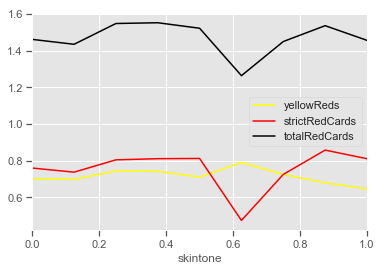

In [120]:
pivot_players=players[players['moreOneCard']].pivot_table(index=['skintone'])
pivot_players[['yellowReds','strictRedCards','totalRedCards']].plot(color=['yellow','red','black'])
plt.show()

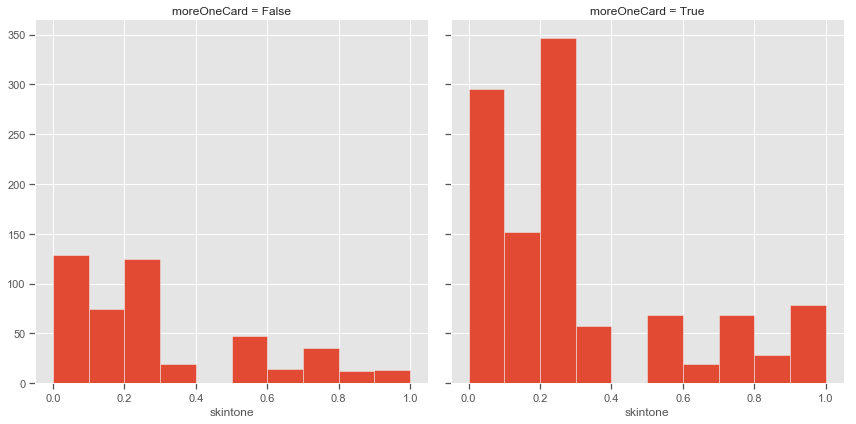

In [121]:
g = sns.FacetGrid(players, col="moreOneCard", height=6)
g.map(plt.hist, "skintone")

>#### Even though form the diagrams we could preliminary estimate players get red card has a little related with skin tone, I speculate there are more reasonable features that could conduce red card to give.

* ## positions
> #### Might the player's position correlate with the baseline susceptibility to red cards? There are many positions in soccer game, and I merge them to 3 levels as defense, midfield and forward. It could save my life more.

In [122]:
defense = ['Center Back','Defensive Midfielder', 'Left Fullback', 'Right Fullback', ]
midfield = ['Right Midfielder', 'Center Midfielder', 'Left Midfielder',]
forward = ['Attacking Midfielder', 'Left Winger', 'Right Winger', 'Center Forward']
keeper = 'Goalkeeper'
players.loc[players['position'].isin(defense), 'position_agg'] = "Defense"
players.loc[players['position'].isin(midfield), 'position_agg'] = "Midfield"
players.loc[players['position'].isin(forward), 'position_agg'] = "Forward"
players.loc[players['position'].eq(keeper), 'position_agg'] = "Keeper"

In [123]:
players.head()

birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   

                        rater1  rater2  yellowReds  strictRedCards  skintone  \
playerShort                                                                    
aaron-hughes              0.25    0.00           0               0     0.125   
aaron-hunt                0.00    0.25           0               1     0.125   
aaron-lennon              0.25    0.25           0               0     0.250   
aaron-ramsey              0.00    0.00           0               1     0.000   
abdelhamid-el-kaoutari    0.25    0.25           1               1     0.250   

                        totalRedCards  moreOneCard position_agg  
playerShort                                                      
aaron-hughes                        0        False      Defense  
aaron-hunt                          1         True      Forward  
aaron-lennon                        0        False     Midfield  
aaron-ramsey                        1         True     Midfield  
abdelhamid-el-kaoutari              2         True      Defense

> #### The bar charts show different types of positions in terms of the overall number of red cards. It is clear that type of defense('Center Back','Defensive Midfielder', 'Left Fullback', 'Right Fullback') is more easy get red cards.

In [124]:
g = sns.FacetGrid(players, col="position_agg", height=6)
g.map(plt.hist, "totalRedCards")

> #### I try to find some relevance between each feature. There is only one significant linear correlation between height and weight.

In [125]:
players_cleaned = players.drop(labels=['rater1','rater2','position'],axis=1) # drop useless column
# players_cleaned.head()

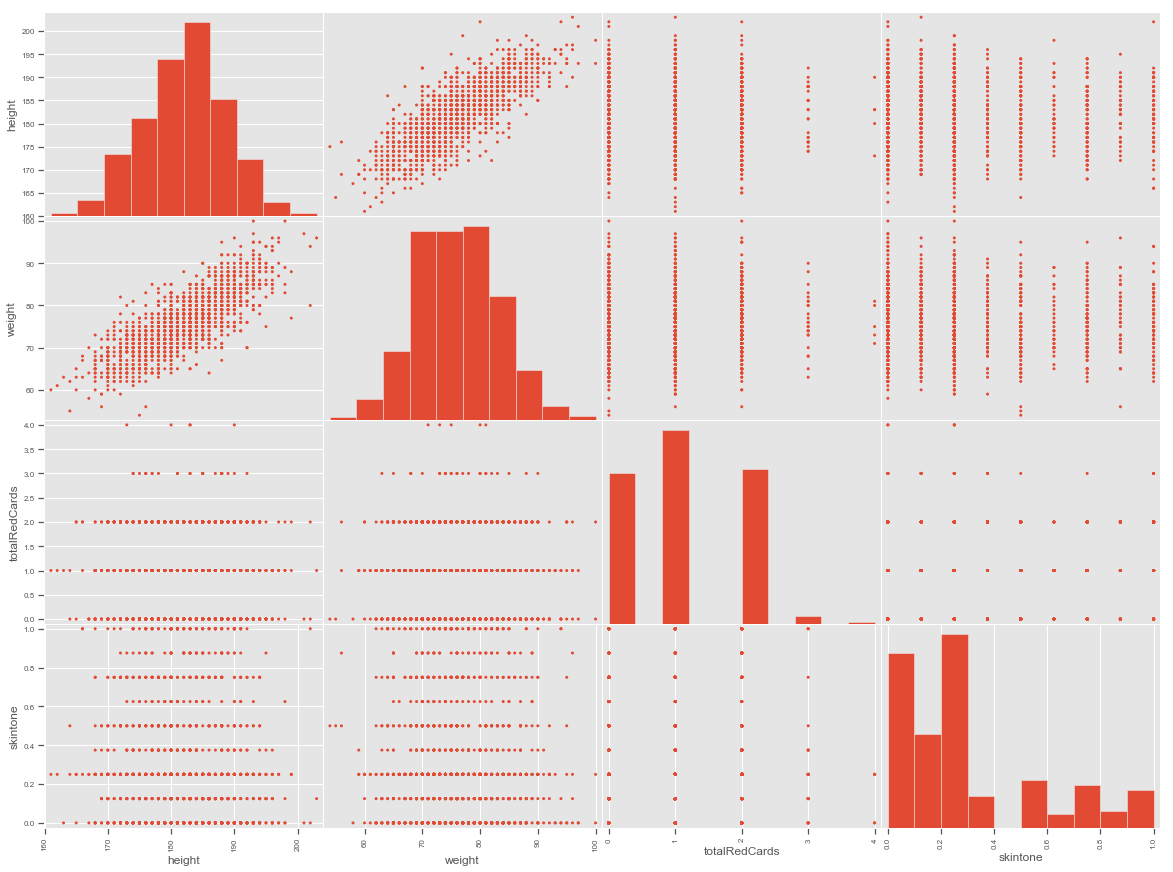

In [126]:
_ = pd.plotting.scatter_matrix(players_cleaned[["height",'weight','totalRedCards','position_agg',"skintone",]], alpha=1, figsize=(20, 15), diagonal='hist')


In [127]:
players_cleaned.to_csv("cleaned_players.csv.gz", compression='gzip')

 ### **The data belong to a discrete random variable, not fit for linear regression to analyse**

* ## Players and Referees

> ####  The next research question is about between soccer referees and players. Referees might have implicit or explicit racial biases to impact the number of red cards.

In [128]:
players = load_subgroup("cleaned_players.csv.gz")
# players.head()

In [142]:
dyads_index = ['refNum', 'playerShort']
dyads_cols = ['games', 'victories','ties', 'defeats', 'goals','yellowCards', 'yellowReds','redCards']
dyads = get_subgroup(data_frame, g_index=dyads_index, g_columns=dyads_cols)

In [143]:
dyads['totalRedCards'] = dyads['yellowReds'] + dyads['redCards'] # totalRedCards
dyads.rename(columns={'redCards': 'strictRedCards'}, inplace=True)
# dyads['totalRedCards'].dropna()
dyads.head()

games  victories  ties  defeats  goals  yellowCards  \
refNum playerShort                                                          
1      lucas-wilchez      1          0     0        1      0            0   
2      john-utaka         1          0     0        1      0            1   
3      abdon-prats        1          0     1        0      0            1   
       pablo-mari         1          1     0        0      0            0   
       ruben-pena         1          1     0        0      0            0   

                      yellowReds  strictRedCards  totalRedCards  
refNum playerShort                                               
1      lucas-wilchez           0               0              0  
2      john-utaka              0               0              0  
3      abdon-prats             0               0              0  
       pablo-mari              0               0              0  
       ruben-pena              0               0              0

In [144]:
player_dyad = (players.merge(dyads.reset_index().set_index('playerShort'),
                                   left_index=True,
                                   right_index=True))
# player_dyad.head()

In [145]:
colnames = ['games', 'totalRedCards']
j = 0
out = [0 for i in range(sum(dyads['games']))]

for index, row in dyads.reset_index().iterrows():
    n = row['games']
    d = row['totalRedCards']
    ref = row['refNum']
    player = row['playerShort']
    for k in range(n):
        row['totalRedCards'] = 1 if (d-k) > 0 else 0
        rowlist=list([ref, player, row['totalRedCards']])
        out[j] = rowlist
        j += 1
tidy_dyads = pd.DataFrame(out, columns=['refNum', 'playerShort', 'redcard'],).set_index(['refNum', 'playerShort'])

> #### Merging players and referees, and create a table type of one-to-many between referees and players.

In [146]:
print(tidy_dyads.shape)
tidy_dyads.redcard.sum()
tidy_dyads.head()

(426572, 1)


redcard
refNum playerShort           
1      lucas-wilchez        0
2      john-utaka           0
3      abdon-prats          0
       pablo-mari           0
       ruben-pena           0

> #### The reason for save data is that the last function takes a long time to calculate. Any changes could load static data to save time.

In [147]:
tidy_dyads.to_csv("tidy_dyads.csv.gz", compression='gzip')

In [149]:
clean_players = load_subgroup("cleaned_players.csv.gz")
tidy_dyads = load_subgroup("tidy_dyads.csv.gz")

> #### The table sums up the numbers of red cards from each referee show out. We could find the highest number is 50 red cards. Most of the referees do not give a penalty during this season.


redcard    50
dtype: int64


redcard
refNum         
468          50
432          50
449          47
916          42
3099         37

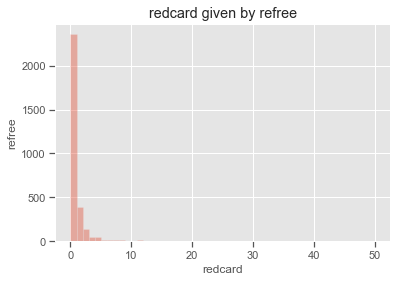

In [168]:
total_ref_given = tidy_dyads.groupby('refNum').sum().sort_values(ascending=False,by='redcard')
sns.distplot(total_ref_given, kde=False);
plt.ylabel('refree')
plt.xlabel('redcard')
plt.title('redcard given by refree')
print(total_ref_given.max())
total_ref_given.head()


> #### There is a figure for the player who is the most amount of red card to be received, and the highest number is 19 red cards. Most players do not receive a red card.

redcard    19
dtype: int64


redcard
playerShort              
cyril-jeunechamp       19
sergio-ramos           19
gary-medel             16
juanfran               15
ballesteros            15

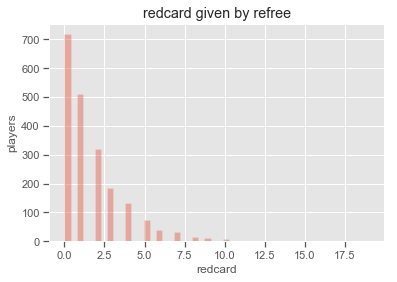

In [173]:
total_player_received = tidy_dyads.groupby('playerShort').sum().sort_values(ascending=False, by='redcard')
sns.distplot(total_player_received, kde=False);
plt.ylabel('players')
plt.xlabel('redcard')
plt.title('redcard given by refree')
print(total_player_received.max())
total_player_received.head()

> #### This chart shows the probability of different skin tone levels to receive a red card. The line form the chat is no fluctuation. Just at the end has a little trend to up. The diagram illustrates that most referees are justice and equity to face each player. However, some of the referees have a propensity to give dark skin tone players a red card more than light skin tone players.

refNum   redcard      height     weight  yellowReds  \
skintone                                                             
0.000     1548.004499  0.010124  182.253468  76.246802    0.566929   
0.125     1514.367746  0.005398  182.773279  76.369595    0.547233   
0.250     1514.170330  0.007021  181.565191  76.317723    0.618437   
0.375     1363.379310  0.022167  181.211823  76.729064    0.583744   
0.500     1532.457143  0.004762  181.525397  75.730337    0.553968   
0.625     1583.187166  0.005348  182.609626  75.128342    0.497326   
0.750     1580.019366  0.001761  180.700704  75.684303    0.626761   
0.875     1623.276995  0.000000  181.971831  76.807512    0.666667   
1.000     1566.949212  0.014011  182.115587  76.374341    0.572680   

          strictRedCards  totalRedCards  moreOneCard  
skintone                                              
0.000           0.605174       1.172103     0.765279  
0.125           0.601889       1.149123     0.762483  
0.250           0.709707       1.328144     0.832112  
0.375           0.692118       1.275862     0.820197  
0.500           0.641270       1.195238     0.734921  
0.625           0.336898       0.834225     0.689840  
0.750           0.605634       1.232394     0.786972  
0.875           0.676056       1.342723     0.826291  
1.000           0.767075       1.339755     0.903678

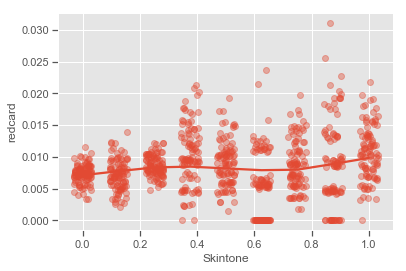

In [182]:
player_ref_game = (tidy_dyads.reset_index()
                               .set_index('playerShort')
                               .merge(clean_players,left_index=True,right_index=True))

bootstrap = pd.concat([player_ref_game.sample(replace=True, 
                                              n=10000).groupby('skintone').mean() for _ in range(100)])

ax = sns.regplot(bootstrap.index.values,
                 y='redcard',
                 data=bootstrap,
                 lowess=True,
                 scatter_kws={'alpha':0.4,},
                 x_jitter=(0.125 / 4.0))
ax.set_xlabel("Skintone")

player_ref_game.sample(replace=True,n=10000).groupby('skintone').mean()
